The goal is to predict the probability distribution of the next word in a sequence given the previous 5 words.

Text pre-processing

In [1]:
#importing necessary library
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
#reading text file as given in Doc.
def read_text_file(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        content = file.read()
    return content

#text_file_path = input("Enter the path to the user-provided text file: ")
text_file_path = "/content/drive/MyDrive/assigment/Auguste_Maquet.txt"
full_text = read_text_file(text_file_path)

In [3]:
#Tokenize the input text into sentences using NLTK's sent_tokenize.
from nltk.tokenize import sent_tokenize

sentences = sent_tokenize(full_text)


In [4]:
#spliting tokenize sentences into the given ratio 10,000 sentences as validation set and 20,000 sentences as test set.

num_sentences = len(sentences)
num_validation = 10000
num_test = 20000

# Training set
training_set = sentences[num_validation + num_test:]

# Validation set
validation_set = sentences[:num_validation]

# Test set
test_set = sentences[num_validation:num_validation + num_test]


In [5]:
#Write a list of sentences to a file.
def write_sentences_to_file(sentences, file_path):
    with open(file_path, 'w', encoding='utf-8') as file:
        file.write('\n'.join(sentences))

# Paths for the sets
training_set_path = "training_set.txt"
validation_set_path = "validation_set.txt"
test_set_path = "test_set.txt"

# Write sets to files
write_sentences_to_file(training_set, training_set_path)
write_sentences_to_file(validation_set, validation_set_path)
write_sentences_to_file(test_set, test_set_path)


EDA -Explordary Data annalysis

In [6]:
#Importing essential libraries for the natural language processing task
import pandas as pd
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk import ngrams
from nltk.probability import FreqDist, ConditionalFreqDist
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import brown


In [7]:
# Load the text file
with open('/content/test_set.txt', 'r', encoding='utf-8') as file:
    text = file.read()

In [8]:
# Tokenize the text
tokens = word_tokenize(text)

In [9]:
# Create n-grams (in this case, 5-grams)
n = 5
ngrams_list = list(ngrams(tokens, n))

In [10]:
# Create conditional frequency distribution(Here we are checking acssiociation of each word and it's respective corpus)
cfd = ConditionalFreqDist((tuple(prev_words), next_word) for *prev_words, next_word in ngrams_list)

In [11]:
ngrams_list

[('Full', 'pardon', 'was', 'accorded', 'to'),
 ('pardon', 'was', 'accorded', 'to', 'those'),
 ('was', 'accorded', 'to', 'those', 'who'),
 ('accorded', 'to', 'those', 'who', 'had'),
 ('to', 'those', 'who', 'had', 'aided'),
 ('those', 'who', 'had', 'aided', 'in'),
 ('who', 'had', 'aided', 'in', 'his'),
 ('had', 'aided', 'in', 'his', 'escape'),
 ('aided', 'in', 'his', 'escape', '.'),
 ('in', 'his', 'escape', '.', 'He'),
 ('his', 'escape', '.', 'He', 'received'),
 ('escape', '.', 'He', 'received', 'also'),
 ('.', 'He', 'received', 'also', 'the'),
 ('He', 'received', 'also', 'the', 'office'),
 ('received', 'also', 'the', 'office', 'of'),
 ('also', 'the', 'office', 'of', 'admiral'),
 ('the', 'office', 'of', 'admiral', ','),
 ('office', 'of', 'admiral', ',', 'which'),
 ('of', 'admiral', ',', 'which', 'had'),
 ('admiral', ',', 'which', 'had', 'been'),
 (',', 'which', 'had', 'been', 'held'),
 ('which', 'had', 'been', 'held', 'by'),
 ('had', 'been', 'held', 'by', 'his'),
 ('been', 'held', 'by', 

In [12]:


# Load the text file
with open('/content/training_set.txt', 'r', encoding='utf-8') as file:
    text = file.read()

# Tokenize the text
tokens = word_tokenize(text)

# Create n-grams (in this case, 5-grams)
n = 5
ngrams_list = list(ngrams(tokens, n))

# Create conditional frequency distribution
cfd = ConditionalFreqDist((tuple(prev_words), next_word) for *prev_words, next_word in ngrams_list)

# Example of conditional frequency distribution
# You can inspect the most common next words for a given set of previous words
prev_words = (',', '“', 'do', 'not', 'injure')
if prev_words in cfd and cfd[prev_words]:
    print(cfd[prev_words].most_common(5))
else:
    print("No data for the given set of previous words.")

# Visualize the frequency distribution if it's not empty
word = 'predict'
freq_dist = cfd[(',', '“', 'do', 'not', 'injure', word)]

if freq_dist:
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(freq_dist.keys()), y=list(freq_dist.values()))
    plt.title(f'Probability Distribution for Next Word: "{word}"')
    plt.xlabel('Next Word')
    plt.ylabel('Frequency')
    plt.show()
else:
    print(f"No frequency distribution available for '{word}'.")


No data for the given set of previous words.
No frequency distribution available for 'predict'.


In [13]:
#To determine the frequency of words in a specific genre

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.


Most common words in the 'adventure' genre:
[('.', 4057), (',', 3488), ('the', 3370), ('and', 1622), ('a', 1354), ('of', 1322), ('to', 1309), ('``', 998), ("''", 995), ('was', 914)]


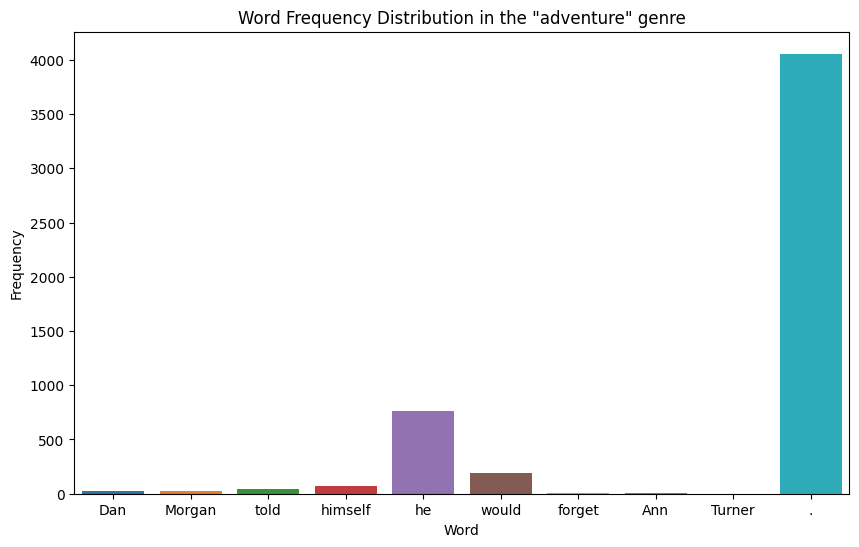

Most common words in the 'belles_lettres' genre:
[('the', 9726), (',', 9166), ('.', 6397), ('of', 6289), ('and', 4282), ('to', 4084), ('a', 3308), ('in', 3089), ('that', 1896), ('is', 1799)]


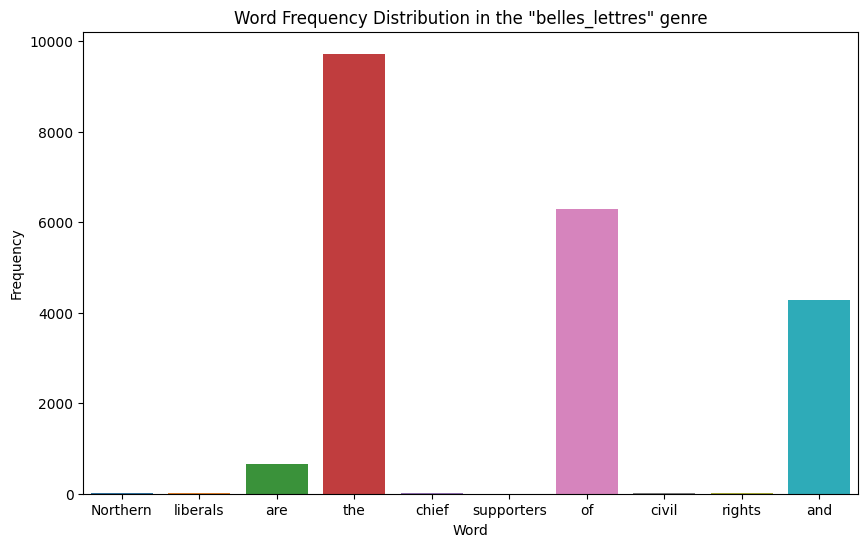

Most common words in the 'editorial' genre:
[('the', 3508), (',', 2766), ('.', 2481), ('of', 1976), ('to', 1554), ('and', 1302), ('a', 1095), ('in', 1001), ('is', 744), ('that', 578)]


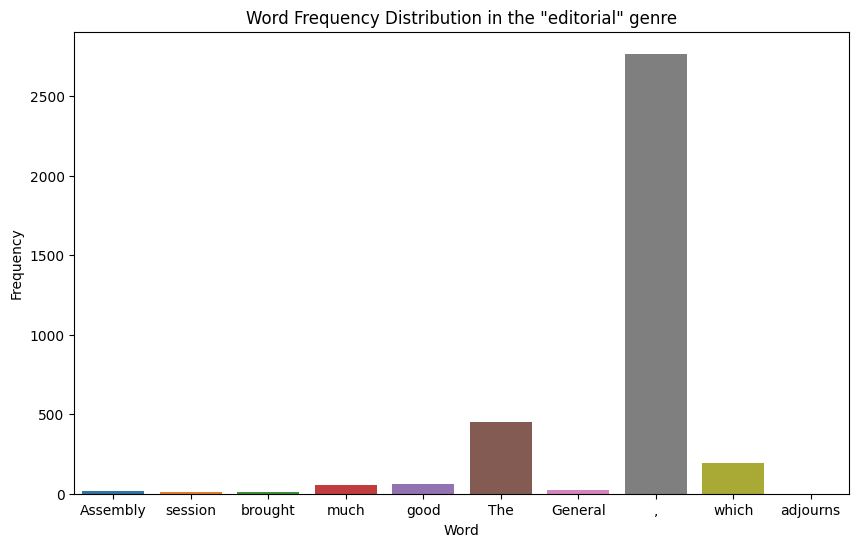

Most common words in the 'fiction' genre:
[(',', 3654), ('.', 3639), ('the', 3423), ('and', 1696), ('to', 1489), ('of', 1419), ('a', 1281), ('was', 1082), ('in', 916), ('he', 813)]


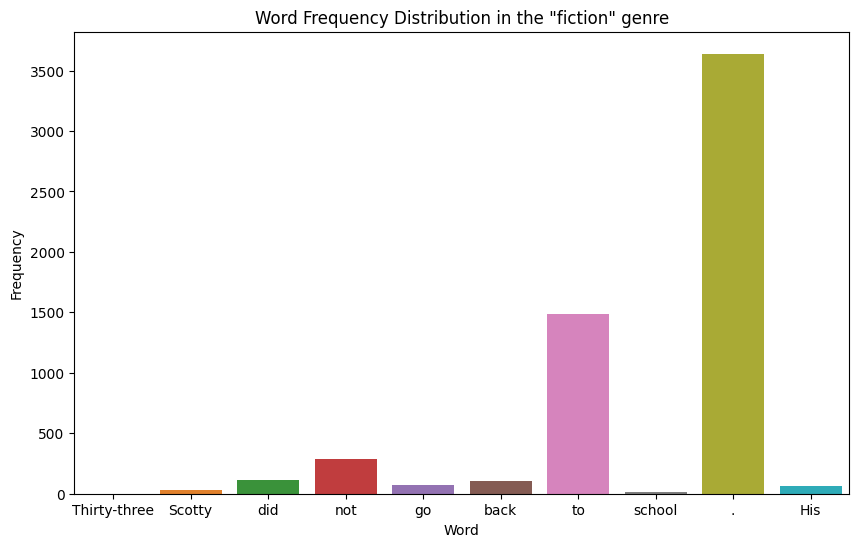

Most common words in the 'government' genre:
[('the', 4143), (',', 3405), ('of', 3031), ('.', 2493), ('and', 1923), ('to', 1829), ('in', 1319), ('a', 867), ('for', 806), ('is', 649)]


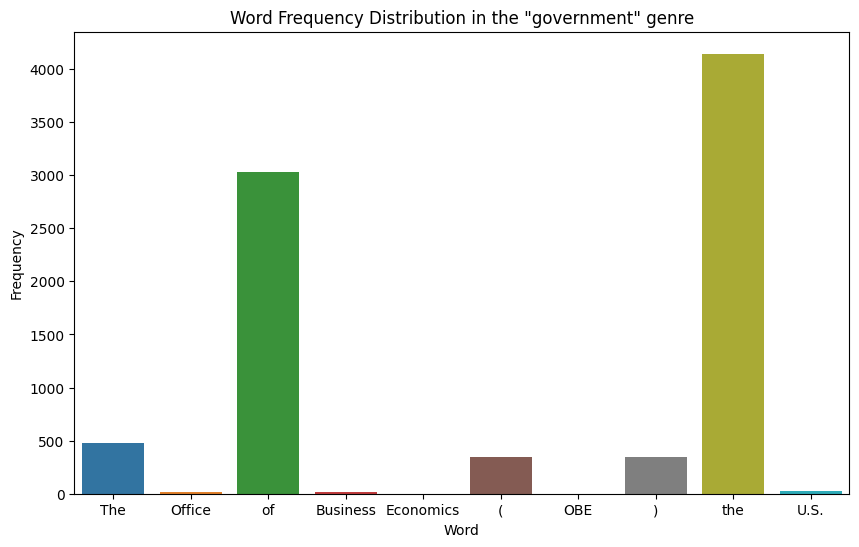

Most common words in the 'hobbies' genre:
[('the', 4300), (',', 3849), ('.', 3453), ('of', 2390), ('and', 2144), ('to', 1797), ('a', 1737), ('in', 1427), ('is', 959), ('for', 776)]


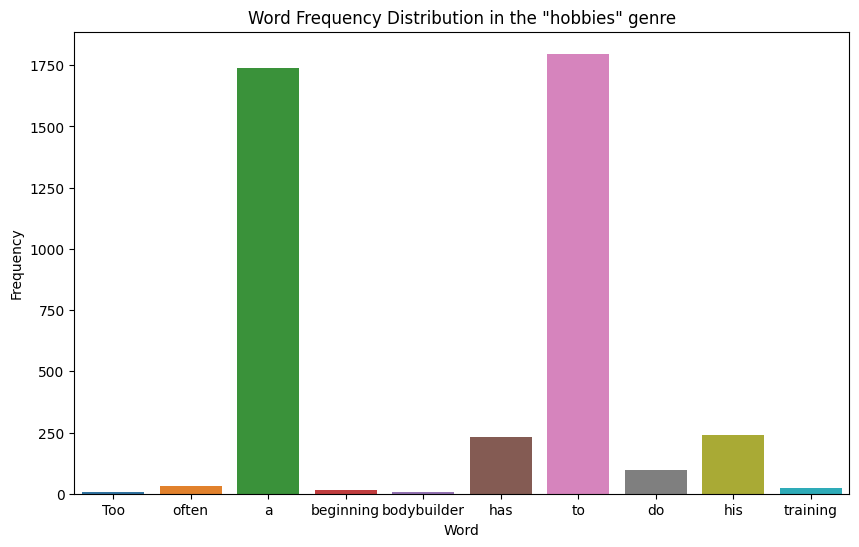

Most common words in the 'humor' genre:
[(',', 1331), ('the', 930), ('.', 877), ('of', 515), ('and', 512), ('a', 505), ('to', 463), ('``', 343), ("''", 340), ('in', 334)]


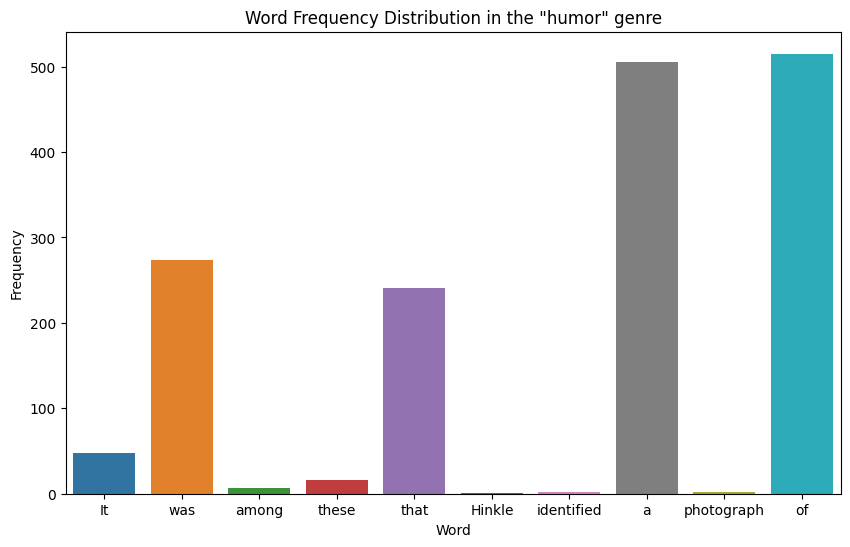

Most common words in the 'learned' genre:
[('the', 11079), (',', 8242), ('of', 7418), ('.', 6773), ('and', 4237), ('to', 3882), ('in', 3644), ('a', 3215), ('is', 2403), ('that', 1695)]


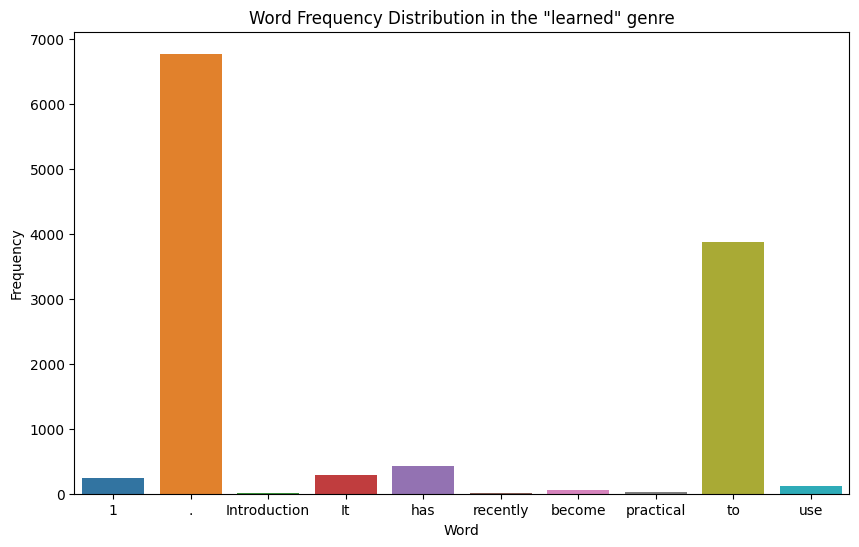

Most common words in the 'lore' genre:
[('the', 6328), (',', 5519), ('.', 4367), ('of', 3668), ('and', 2758), ('to', 2530), ('a', 2304), ('in', 2001), ('is', 1007), ('that', 984)]


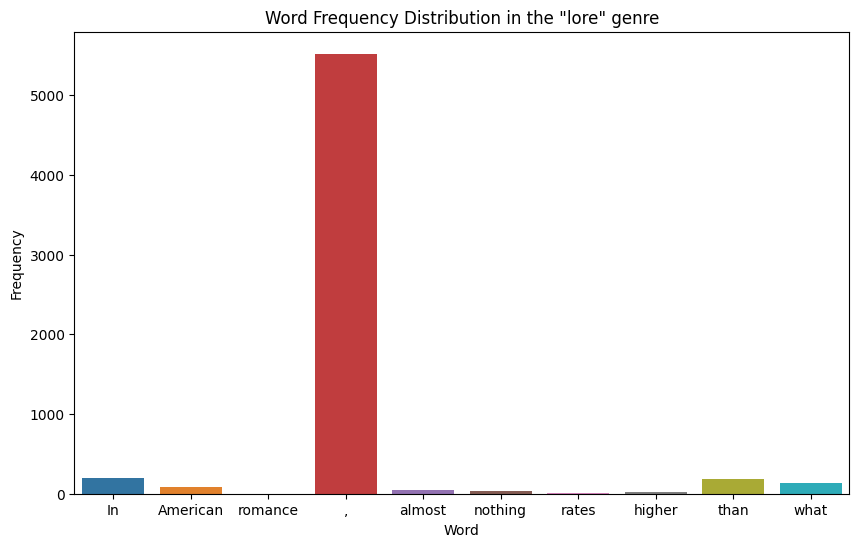

Most common words in the 'mystery' genre:
[('.', 3326), (',', 2805), ('the', 2573), ('to', 1284), ('and', 1215), ('a', 1136), ('of', 903), ('was', 820), ('``', 740), ("''", 738)]


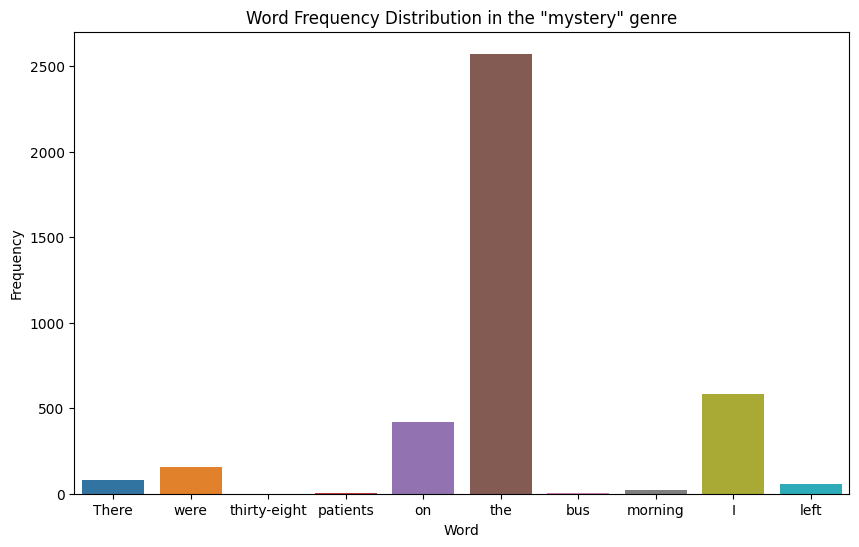

Most common words in the 'news' genre:
[('the', 5580), (',', 5188), ('.', 4030), ('of', 2849), ('and', 2146), ('to', 2116), ('a', 1993), ('in', 1893), ('for', 943), ('The', 806)]


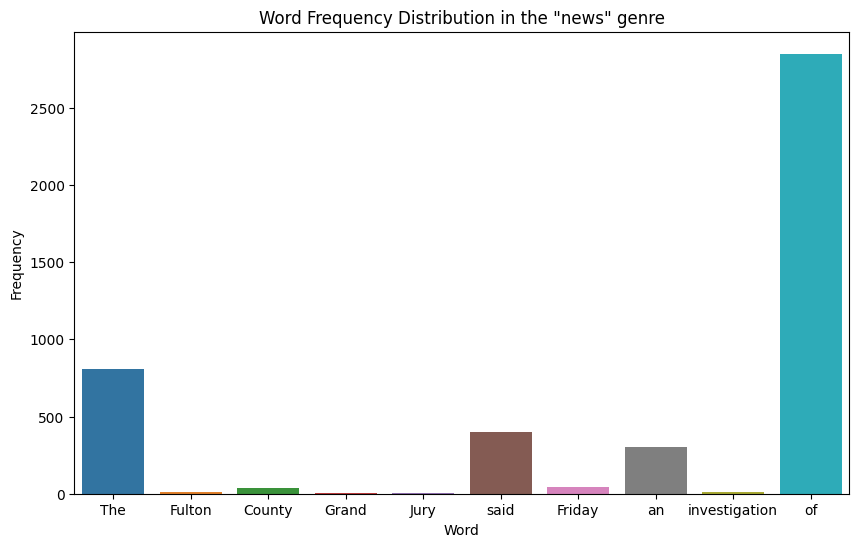

Most common words in the 'religion' genre:
[('the', 2295), (',', 1913), ('of', 1494), ('.', 1382), ('and', 921), ('to', 882), ('in', 724), ('a', 655), ('is', 533), ('that', 475)]


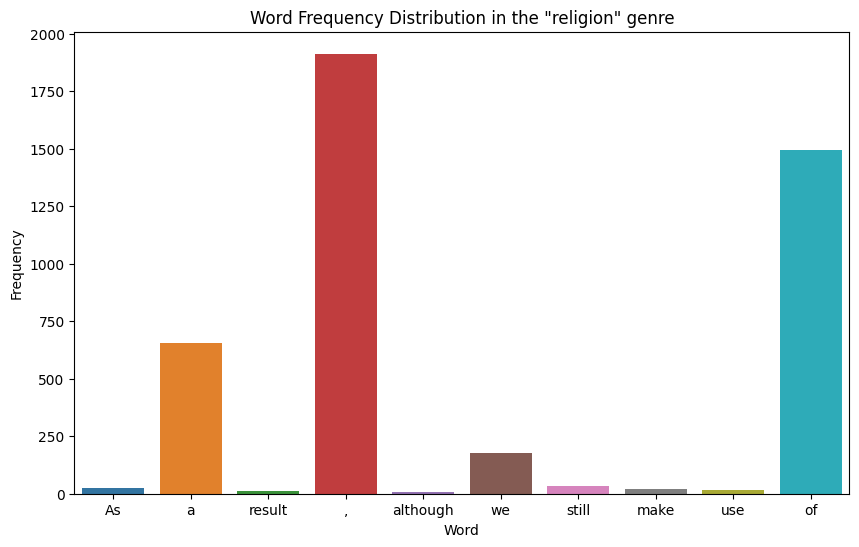

Most common words in the 'reviews' genre:
[(',', 2318), ('the', 2048), ('.', 1549), ('of', 1299), ('and', 1103), ('a', 874), ('to', 706), ('in', 656), ('is', 513), ('``', 390)]


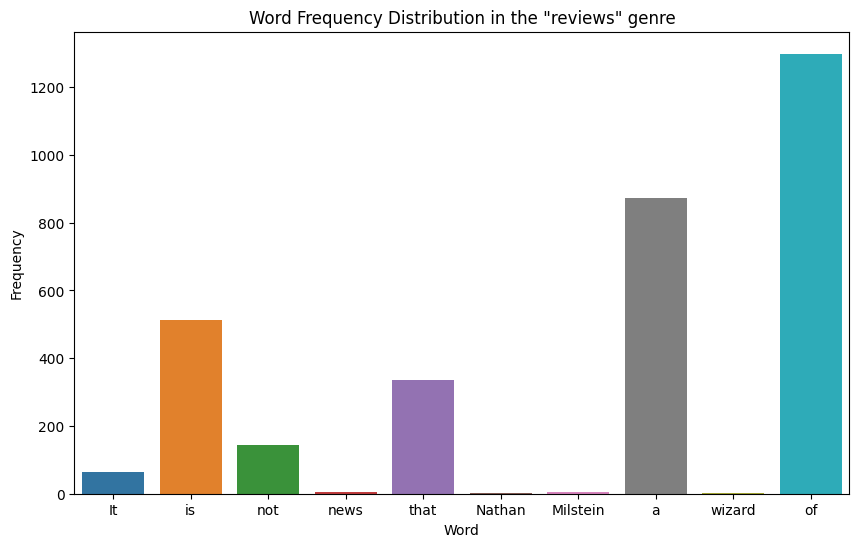

Most common words in the 'romance' genre:
[(',', 3899), ('.', 3736), ('the', 2758), ('and', 1776), ('to', 1502), ('a', 1335), ('of', 1186), ('``', 1045), ("''", 1044), ('was', 993)]


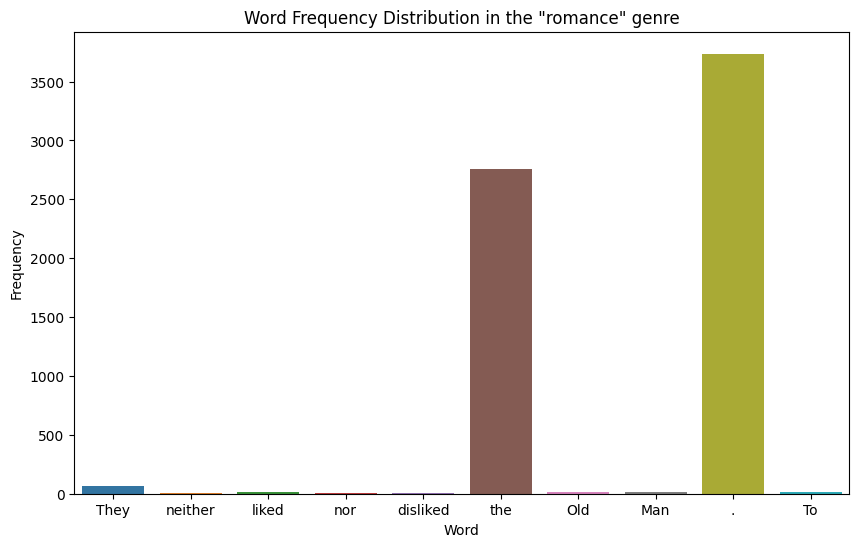

Most common words in the 'science_fiction' genre:
[(',', 791), ('.', 786), ('the', 652), ('of', 321), ('to', 305), ('and', 278), ('``', 235), ("''", 235), ('a', 222), ('was', 198)]


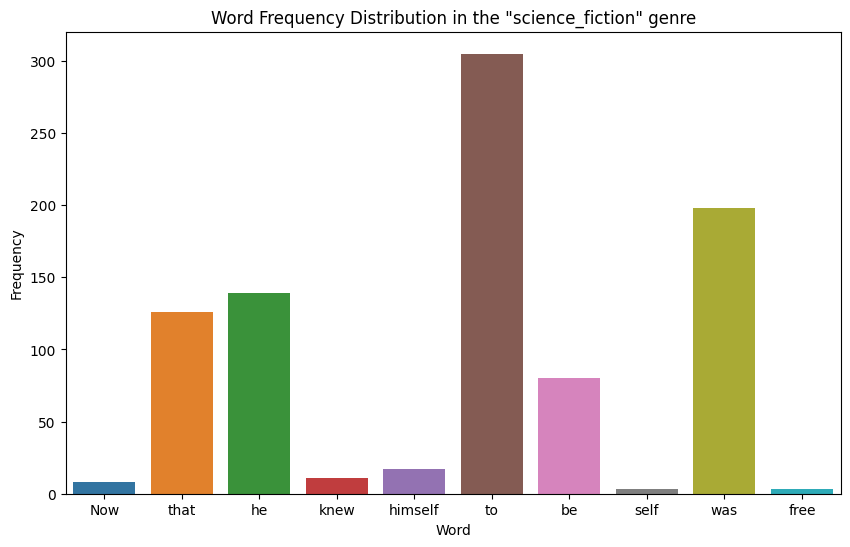

In [14]:

# Download the Brown Corpus (if not already downloaded)
nltk.download('brown')

# Specify the list of genres you're interested in
target_genres = [
    'adventure',
    'belles_lettres',
    'editorial',
    'fiction',
    'government',
    'hobbies',
    'humor',
    'learned',
    'lore',
    'mystery',
    'news',
    'religion',
    'reviews',
    'romance',
    'science_fiction'
]

# Visualize the word frequency distribution for each genre
for target_genre in target_genres:
    # Get the words from the specified genre
    words_in_genre = brown.words(categories=target_genre)

    # Calculate word frequency
    freq_dist = FreqDist(words_in_genre)

    # Print the most common words
    print("Most common words in the '{}' genre:".format(target_genre))
    print(freq_dist.most_common(10))

    # Visualize the frequency distribution
    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(freq_dist.keys())[:10], y=list(freq_dist.values())[:10])
    plt.title(f'Word Frequency Distribution in the "{target_genre}" genre')
    plt.xlabel('Word')
    plt.ylabel('Frequency')
    plt.show()


Overview of EDA Reults:-

From the above EDA we conclude that Adjustments and experimentation may be necessary to fine-tune our model for better results.

N-gram models depends on the characteristics of the text data and the task we are trying to accomplish.

Word embedding finding

In [15]:
# # Function for forward pass through the model
# def stacked_lstm_forward(input_sequence, embedding, lstm_layers, linear_layer):
#     # Initialize hidden states and cell states
#     batch_size = input_sequence.size(0)
#     h_states = [torch.zeros(batch_size, hidden_dim) for _ in range(len(lstm_layers))]
#     c_states = [torch.zeros(batch_size, hidden_dim) for _ in range(len(lstm_layers))]

#     # Embedding layer
#     embedded_sequence = embedding(input_sequence)

#     # Forward pass through stacked LSTM layers
#     for i, lstm_layer in enumerate(lstm_layers):
#         # LSTMCell expects 2D input, so we reshape the input
#         embedded_sequence = embedded_sequence.view(batch_size, -1)
#         h_states[i], c_states[i] = lstm_layer(embedded_sequence, (h_states[i], c_states[i]))

#     # Concatenate hidden states from all LSTM layers
#     concatenated_hidden = torch.cat(h_states, dim=1)

#     # Linear layer
#     linear_output = linear_layer(concatenated_hidden)

#     return linear_output


#Dataset creation

In [16]:
#Here we are using Word Embeddings pre-trained model from glove.

In [17]:
!wget https://nlp.stanford.edu/data/glove.6B.zip

--2023-12-29 13:10:04--  https://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2023-12-29 13:10:04--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glove.6B.zip        100%[===================>] 822.24M  5.02MB/s    in 2m 39s  

2023-12-29 13:12:43 (5.19 MB/s) - ‘glove.6B.zip’ saved [862182613/862182613]



In [18]:
!unzip /content/glove.6B.zip

Archive:  /content/glove.6B.zip
  inflating: glove.6B.50d.txt        
  inflating: glove.6B.100d.txt       
  inflating: glove.6B.200d.txt       
  inflating: glove.6B.300d.txt       


In [19]:
#Importing essential libraries
import torch
from tqdm import tqdm
from torchtext.vocab import GloVe
from torch.utils.data import Dataset, DataLoader
from torch.nn import Embedding
import os
import pickle

In [20]:
#Load 5-gram GloVe vectors from a file and return a dictionary.
def load_5gram_glove_vectors(file_path):
  ngram_vectors = {}
  with open(file_path, 'r', encoding='utf-8') as f:
      for line in tqdm(f, "Loading GloVe", leave=False):
          values = line.split()

          ngram = values[:5]  # Assuming 5-grams
          vector = torch.tensor([float(val) for val in values[5:]])
          ngram_vectors[tuple(ngram)] = vector
  return ngram_vectors

In [21]:
glove_5gram_path = '/content/glove.6B.300d.txt'
glove_5gram_vectors = load_5gram_glove_vectors(glove_5gram_path)

In [22]:
#Preprocess your data (tokenization, vocabulary creation)
def preprocess_data(data_path):
    with open(data_path, 'r', encoding='utf-8') as f:
        text_data = [line.strip().split() for line in f.readlines()]
    vocab = {word: idx for idx, word in enumerate(set(word for sent in text_data for word in sent))}
    return text_data, vocab

In [23]:
#Generate 5-grams from a list of sentences.
def create_5grams(text_data):
    ngrams = []
    for sentence in text_data:
        if len(sentence) >= 5:
            ngrams.extend([tuple(sentence[i:i+5]) for i in range(len(sentence)-4)])
    return ngrams

In [24]:
#text_data, vocab = preprocess_data("/content/drive/MyDrive/assigment/Auguste_Maquet.txt")
#text_data, vocab = preprocess_data("/content/drive/MyDrive/assigment/prompt.txt")
text_data, vocab = preprocess_data("/content/training_set.txt")

In [25]:
#Custom PyTorch Dataset for working with 5-grams.
class CustomDataset(Dataset):
    def __init__(self, ngrams, vocab):
        self.ngrams = ngrams
        self.vocab = vocab

    def __len__(self):
        return len(self.ngrams)

    def __getitem__(self, idx):
        # Convert 5-gram to numerical indices using the vocabulary
        indices = [self.vocab[word] for word in self.ngrams[idx]]
        return torch.tensor(indices)

In [26]:
glove_vectors = GloVe(name='6B', dim=300)

# Step 4: Initialize embeddings
embedding_layer = Embedding(len(vocab), 300)

100%|█████████▉| 399999/400000 [01:06<00:00, 6026.03it/s]


In [27]:
# Initialize the embedding layer weights with GloVe vectors
for ngram, idx in tqdm(vocab.items(), "Initializing 5-gram Embeddings", leave=False):
    if all(word in glove_vectors.stoi for word in ngram):
        embedding_layer.weight.data[idx] = torch.mean(torch.stack([glove_vectors[word] for word in ngram]), dim=0)



In [28]:
#Save embeddings for 5-grams
# You can save the embedding layer weights to a file using torch.save
embedding_5gram_file_path = 'embedding_5gram_weights.pt'
torch.save(embedding_layer.weight.data, embedding_5gram_file_path)

In [29]:
# Optionally, you can save the vocabulary as well
vocab_file_path = 'vocab.pkl'
with open(vocab_file_path, 'wb') as vocab_file:
    pickle.dump(vocab, vocab_file)

In [30]:
# Load the vocabulary
vocab_file_path = 'vocab.pkl'
with open(vocab_file_path, 'rb') as vocab_file:
    vocab = pickle.load(vocab_file)

In [31]:
# Load the pre-trained embedding weights
embedding_weights_file_path = '/content/embedding_5gram_weights.pt'
embedding_weights = torch.load(embedding_weights_file_path)

In [37]:

# Load your embeddings from the 'embedding_weights.pt' file
# embedding_weights = torch.load('/content/embedding_5gram_weights.pt')

# Read the dataset from a text file
def read_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        dataset = [line.strip().split() for line in file.readlines()]
    return dataset

# Example: Assuming your dataset is in a text file named 'your_dataset.txt'
#dataset_file_path = '/content/drive/MyDrive/assigment/Auguste_Maquet.txt'
dataset_file_path = '/content/training_set.txt'
dataset = read_dataset(dataset_file_path)

# Create a vocabulary (replace this with your actual vocabulary creation)
vocab = {word: idx for idx, word in enumerate(set(word for sent in dataset for word in sent))}



In [38]:
embedding_weights.size()

torch.Size([16170, 300])

In [39]:
len(vocab)

16170

In [40]:
# Function to create 5-gram tensors and target word indices
def create_5gram_tensors(dataset, vocab):
    data = []
    for sentence in dataset:
        for i in range(len(sentence) - 5):
            # Extract the 5-gram
            ngram = sentence[i:i + 5]

            # Convert the 5-gram to indices using the vocabulary
            ngram_indices = torch.tensor([vocab[word] for word in ngram])
            #print("Size of ngram_indices:", ngram_indices.size())
            # The target word is the word that follows the 5-gram
            target_word = vocab[sentence[i + 5]]

            # Create a tuple with the 5-gram tensor and target word index
            data.append((ngram_indices, target_word))
    return data

# Create the training data
train_data = create_5gram_tensors(dataset, vocab)

# we are checking head of the of the word embeddings as given.
# Print the first few samples in the training data
for i in range(5):
    print(train_data[i]) # here we are getting target word and 5 word as prescribed .

(tensor([11156,   809,  7961,  7286,  1180]), 6468)
(tensor([ 809, 7961, 7286, 1180, 6468]), 7120)
(tensor([7961, 7286, 1180, 6468, 7120]), 7162)
(tensor([7286, 1180, 6468, 7120, 7162]), 7961)
(tensor([1180, 6468, 7120, 7162, 7961]), 10418)


#Training dataset creation complited .

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
import math
from torch.utils.data import DataLoader, TensorDataset

In [42]:


# Function to create stacked LSTM model
def create_stacked_lstm_model(vocab_size, embedding_dim, hidden_dim, num_layers):
    # Embedding layer
    embedding = nn.Embedding(vocab_size, embedding_dim)

    # Stacked LSTM layers
    lstm_layers = nn.ModuleList([nn.LSTMCell(embedding_dim if i == 0 else hidden_dim, hidden_dim) for i in range(num_layers)])

    # Linear layer
    linear_layer = nn.Linear(hidden_dim, vocab_size)

    return embedding, lstm_layers, linear_layer

def stacked_lstm_forward(input_sequence, embedding, lstm_layers, linear_layer):
    # Initialize hidden states and cell states
    batch_size, sequence_length = input_sequence.size(0), input_sequence.size(1)
    h_states = [torch.zeros(batch_size, hidden_dim) for _ in range(len(lstm_layers))]
    c_states = [torch.zeros(batch_size, hidden_dim) for _ in range(len(lstm_layers))]

    # Embedding layer
    embedded_sequence = embedding(input_sequence)

    # Forward pass through stacked LSTM layers for each timestep
    for t in range(sequence_length):
        input_timestep = embedded_sequence[:, t, :]

        for i, lstm_layer in enumerate(lstm_layers):
            h_states[i], c_states[i] = lstm_layer(input_timestep, (h_states[i], c_states[i]))

    # Final hidden state is used for the Linear layer
    final_hidden_state = h_states[-1]

    # Linear layer
    linear_output = linear_layer(final_hidden_state)

    return linear_output


In [43]:
# Assuming vocab_size, embedding_dim, hidden_dim, and num_layers are defined
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 300
num_layers = 3  # You can adjust the number of layers

# Create the stacked LSTM model
embedding, lstm_layers, linear_layer = create_stacked_lstm_model(vocab_size, embedding_dim, hidden_dim, num_layers)


# Example usage
input_sequence = torch.randint(0, vocab_size, (32, 5))  # Example input sequence
output_probs = stacked_lstm_forward(input_sequence, embedding, lstm_layers, linear_layer)
#output_probs = stacked_lstm_forward(input_sequence, embedding, lstm_layers, linear_layer)

# Check the shape of the output
print("Output Shape:", output_probs.shape)

Output Shape: torch.Size([32, 16170])


In [44]:

# Assuming you have specified vocab_size, embedding_dim, and hidden_dim
vocab_size = len(vocab)
embedding_dim = 300
hidden_dim = 300
batch_size = 32
# Create lists for inputs and targets
inputs = [item[0] for item in train_data]
targets = [item[1] for item in train_data]

# Convert lists to tensors
input_tensors = torch.stack(inputs)
target_tensors = torch.tensor(targets)

# Create TensorDataset directly
train_dataset = TensorDataset(input_tensors, target_tensors)

# Create a DataLoader
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [45]:
import torch.optim as optim

# Set up criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(list(embedding.parameters()) + list(linear_layer.parameters()) + sum([list(l.parameters()) for l in lstm_layers], []), lr=0.01)

# Training loop with batches
num_epochs = 5
for epoch in range(num_epochs):
    total_loss = 0.0
    total_words = 0

    for input_5grams, target_word_indices in train_loader:
        optimizer.zero_grad()

        #input_5grams, target_word_indices = input_5grams.to(device), target_word_indices.to(device)
        #input_5grams, target_word_indices = input_5grams, target_word_indices

        # Forward pass
        # Initialize the model
        output_probs = stacked_lstm_forward(input_5grams, embedding, lstm_layers, linear_layer)

        # Flatten the output for the loss calculation
        flat_output_probs = output_probs.view(-1, vocab_size)
        flat_target_word_indices = target_word_indices.view(-1)

        # Calculate the loss
        loss = criterion(flat_output_probs, flat_target_word_indices)

        # Backpropagation and optimization step
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        total_words += flat_target_word_indices.numel()  # Number of words in the batch

    # Calculate perplexity
    perplexity = math.exp(total_loss / total_words)

    print(f'Epoch {epoch + 1}, Loss: {total_loss / len(train_loader)}, Perplexity: {perplexity}')

Epoch 1, Loss: 9.505056202079407, Perplexity: 1.345929370242154
Epoch 2, Loss: 8.442437812237436, Perplexity: 1.301961724623104
Epoch 3, Loss: 7.431510609262099, Perplexity: 1.2614667950553151
Epoch 4, Loss: 7.12151063724505, Perplexity: 1.2493032301938995
Epoch 5, Loss: 6.953009572183275, Perplexity: 1.2427409756613466


Validation data

In [70]:
# Read the dataset from a text file
def read_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        dataset = [line.strip().split() for line in file.readlines()]
    return dataset

# Example: Assuming your dataset is in a text file named 'your_dataset.txt'
#dataset_file_path = '/content/drive/MyDrive/assigment/Auguste_Maquet.txt'
valid_dataset_file_path = '/content/validation_set.txt'
dataset_valid = read_dataset(valid_dataset_file_path)

# Create a vocabulary (replace this with your actual vocabulary creation)
vocab_valid = {word: idx for idx, word in enumerate(set(word for sent in dataset_valid for word in sent))}



In [71]:
# Function to create 5-gram tensors and target word indices

# Create the training data
valid_data = create_5gram_tensors(dataset_valid, vocab_valid)

# we are checking head of the of the word embeddings as given.
# Print the first few samples in the training data
for i in range(5):
    print(valid_data[i]) # here we are getting target word and 5 word as prescribed .

(tensor([ 4784, 22038, 10697,  1088, 23068]), 19062)
(tensor([22038, 10697,  1088, 23068, 19062]), 16138)
(tensor([10697,  1088, 23068, 19062, 16138]), 20253)
(tensor([  468,  1100, 23138,  2473, 14229]), 2565)
(tensor([ 1100, 23138,  2473, 14229,  2565]), 23068)


In [67]:
# Create lists for inputs and targets
inputs_valid = [item[0] for item in valid_data]
targets_valid  = [item[1] for item in valid_data]

# Convert lists to tensors
input_tensors_test= torch.stack(inputs_valid)
target_tensors_test = torch.tensor(targets_valid)

In [68]:
# Create TensorDataset directly
test_dataset = TensorDataset(input_tensors_test, target_tensors_test)
batch_size = 10
# Create a DataLoader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [69]:
import math

# Evaluation loop
total_loss = 0.0
total_words = 0

with torch.no_grad():
     for input_5grams, target_word_indices in test_loader:

        # Forward pass
        # Initialize the model
        output_probs = stacked_lstm_forward(input_5grams, embedding, lstm_layers, linear_layer)

        # Calculate the loss
        loss = criterion(output_probs, target_word_indices)#Expontional of loss

        # Accumulate loss and count words
        total_loss += loss.item()
        total_words += target_word_indices.numel()

# Calculate perplexity for the entire test set
perplexity = math.exp(total_loss / total_words)

print(f'valid Perplexity score: {perplexity}') #

valid Perplexity score: 2.887993685156378


#Testing

In [62]:
# Read the dataset from a text file
def read_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        dataset = [line.strip().split() for line in file.readlines()]
    return dataset

# Example: Assuming your dataset is in a text file named 'your_dataset.txt'
#dataset_file_path = '/content/drive/MyDrive/assigment/Auguste_Maquet.txt'
test_dataset_file_path = '/content/drive/MyDrive/assigment/test.txt'
dataset_test = read_dataset(test_dataset_file_path)

# Create a vocabulary (replace this with your actual vocabulary creation)
vocab_test = {word: idx for idx, word in enumerate(set(word for sent in dataset_test for word in sent))}



In [63]:
# Function to create 5-gram tensors and target word indices

# Create the training data
test_data = create_5gram_tensors(dataset_test, vocab_test)

# we are checking head of the of the word embeddings as given.
# Print the first few samples in the training data
for i in range(5):
    print(test_data[i]) # here we are getting target word and 5 word as prescribed .

(tensor([39, 40, 38, 60,  7]), 44)
(tensor([40, 38, 60,  7, 44]), 33)
(tensor([38, 60,  7, 44, 33]), 0)
(tensor([60,  7, 44, 33,  0]), 34)
(tensor([ 7, 44, 33,  0, 34]), 63)


In [64]:

# Create lists for inputs and targets
inputs_test = [item[0] for item in test_data]
targets_test = [item[1] for item in test_data]

# Convert lists to tensors
input_tensors_test= torch.stack(inputs_test)
target_tensors_test = torch.tensor(targets_test)

In [65]:
# Create TensorDataset directly
test_dataset = TensorDataset(input_tensors_test, target_tensors_test)
batch_size = 10
# Create a DataLoader
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [66]:
import math

# Evaluation loop
total_loss = 0.0
total_words = 0

with torch.no_grad():
     for input_5grams, target_word_indices in test_loader:

        # Forward pass
        # Initialize the model
        output_probs = stacked_lstm_forward(input_5grams, embedding, lstm_layers, linear_layer)

        # Calculate the loss
        loss = criterion(output_probs, target_word_indices)#Expontional of loss

        # Accumulate loss and count words
        total_loss += loss.item()
        total_words += target_word_indices.numel()

# Calculate perplexity for the entire test set
perplexity = math.exp(total_loss / total_words)

print(f'Test Perplexity score: {perplexity}') #

Test Perplexity score: 1.5369312524310383
